In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv(r"datasets/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3.0,75075.31,2,1,0,92888.52,1


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                2
Tenure             1
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df["Geography"].fillna(df["Geography"].mode(), inplace=True)
df["Gender"].fillna(df["Gender"].mode(), inplace=True)
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Tenure"].fillna(df["Tenure"].mean(), inplace=True)

C:\Users\rishi\AppData\Local\Temp\ipykernel_22808\1352206450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Geography"].fillna(df["Geography"].mode(), inplace=True)
C:\Users\rishi\AppData\Local\Temp\ipykernel_22808\1352206450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             2
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28.0,4.0,130142.79,1,1,0,38190.78,0


In [9]:
encoder = LabelEncoder()
df["Geography"] = encoder.fit_transform(df["Geography"])
df["Gender"] = encoder.fit_transform(df["Gender"])

In [10]:
df['Geography'].mode()[0]

0

In [11]:
X=df.iloc[:,3:13]
y=df.iloc[:,13:14]
X = pd.get_dummies(X, columns=["Geography"], drop_first=True).astype(int) # One-Hot Encoding for Geography
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Geography_3
0,619,0,42,2,0,1,1,1,101348,0,0,0
1,608,0,41,1,83807,1,0,1,112542,0,1,0
2,502,0,42,8,159660,3,1,0,113931,0,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0,2,1,0,96270,0,0,0
9996,516,1,35,10,57369,1,1,1,101699,0,0,0
9997,709,0,36,7,0,1,0,1,42085,0,0,0
9998,772,1,42,3,75075,2,1,0,92888,1,0,0


In [12]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.35649971,  0.91255743, -0.65581248, ..., -0.57946723,
        -0.57638802,  0.        ],
       [-0.20389777,  0.91255743,  0.29491596, ...,  1.72572313,
        -0.57638802,  0.        ],
       [-0.96147213,  0.91255743, -1.41639523, ..., -0.57946723,
         1.73494238,  0.        ],
       ...,
       [ 0.86500853, -1.09471764, -0.08537541, ..., -0.57946723,
        -0.57638802,  0.        ],
       [ 0.15932282,  0.91255743,  0.38998881, ..., -0.57946723,
        -0.57638802,  0.        ],
       [ 0.47065475,  0.91255743,  1.15057156, ...,  1.72572313,
        -0.57638802,  0.        ]])

In [21]:
X.shape

(10000, 12)

In [15]:
def ann_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        layers.Dense(16, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(8, activation=activation),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [16]:
activations = ["relu", "tanh", "sigmoid"]
optimizers = ["adam", "sgd"]

In [28]:
results=[]
histories={}
for activation in activations:
    for optimizer in optimizers:
        print(f"Training with Activation: {activation}, Optimizer: {optimizer}")
        model = ann_model(activation, optimizer)
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
        loss, accuracy = model.evaluate(X_test, y_test)
        results.append({
            "Activation": activation,
            "Optimizer": optimizer,
            "Accuracy": accuracy,
            "Loss": loss
        })
        histories[f"{activation}_{optimizer}"] = history.history

Training with Activation: relu, Optimizer: adam
Epoch 1/20


C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3905 - loss: 0.8618 - val_accuracy: 0.8045 - val_loss: 0.4798
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.4659 - val_accuracy: 0.8215 - val_loss: 0.4183
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.4200 - val_accuracy: 0.8325 - val_loss: 0.3977
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8278 - loss: 0.4115 - val_accuracy: 0.8430 - val_loss: 0.3816
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8370 - loss: 0.3901 - val_accuracy: 0.8480 - val_loss: 0.3676
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.3788 - val_accuracy: 0.8525 - val_loss: 0.3559
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3529 - val_accuracy: 0.8525 - val_loss: 0.3495
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8542 - loss: 0.3566 - val_accuracy: 0.8540 - val_

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5656 - loss: 0.7135 - val_accuracy: 0.8010 - val_loss: 0.5553
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.5353 - val_accuracy: 0.8055 - val_loss: 0.5096
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.5050 - val_accuracy: 0.8045 - val_loss: 0.4856
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4849 - val_accuracy: 0.8085 - val_loss: 0.4675
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4749 - val_accuracy: 0.8085 - val_loss: 0.4533
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8025 - loss: 0.4574 - val_accuracy: 0.8085 - val_loss: 0.4430
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.4545 - val_accuracy: 0.8130 - val_loss: 0.4354
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.4360 - val_accuracy: 0.8145 - val_

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6907 - loss: 0.5886 - val_accuracy: 0.8100 - val_loss: 0.4131
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4260 - val_accuracy: 0.8260 - val_loss: 0.3912
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8166 - loss: 0.4131 - val_accuracy: 0.8345 - val_loss: 0.3746
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8337 - loss: 0.3861 - val_accuracy: 0.8445 - val_loss: 0.3631
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.3705 - val_accuracy: 0.8500 - val_loss: 0.3551
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3659 - val_accuracy: 0.8550 - val_loss: 0.3495
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3493 - val_accuracy: 0.8630 - val_loss: 0.3475
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.3540 - val_accuracy: 0.8620 - val_

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6041 - loss: 0.6634 - val_accuracy: 0.8035 - val_loss: 0.5060
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.5036 - val_accuracy: 0.8050 - val_loss: 0.4639
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7930 - loss: 0.4765 - val_accuracy: 0.8070 - val_loss: 0.4460
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4546 - val_accuracy: 0.8100 - val_loss: 0.4352
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4474 - val_accuracy: 0.8115 - val_loss: 0.4278
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4334 - val_accuracy: 0.8150 - val_loss: 0.4231
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8120 - loss: 0.4322 - val_accuracy: 0.8160 - val_loss: 0.4199
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8083 - loss: 0.4334 - val_accuracy: 0.8170 - val_

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3357 - loss: 0.8643 - val_accuracy: 0.8035 - val_loss: 0.5187
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.5093 - val_accuracy: 0.8035 - val_loss: 0.4701
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4777 - val_accuracy: 0.8035 - val_loss: 0.4515
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 0.4667 - val_accuracy: 0.8050 - val_loss: 0.4358
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8034 - loss: 0.4392 - val_accuracy: 0.8160 - val_loss: 0.4248
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8137 - loss: 0.4375 - val_accuracy: 0.8145 - val_loss: 0.4176
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8157 - loss: 0.4345 - val_accuracy: 0.8135 - val_loss: 0.4137
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.4357 - val_accuracy: 0.8145 - val_

C:\Users\rishi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7298 - loss: 0.6131 - val_accuracy: 0.8035 - val_loss: 0.4992
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.5033 - val_accuracy: 0.8035 - val_loss: 0.4890
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.4996 - val_accuracy: 0.8035 - val_loss: 0.4874
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7916 - loss: 0.5034 - val_accuracy: 0.8035 - val_loss: 0.4866
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 0.5124 - val_accuracy: 0.8035 - val_loss: 0.4858
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4960 - val_accuracy: 0.8035 - val_loss: 0.4852
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7873 - loss: 0.5075 - val_accuracy: 0.8035 - val_loss: 0.4843
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4912 - val_accuracy: 0.8035 - val_

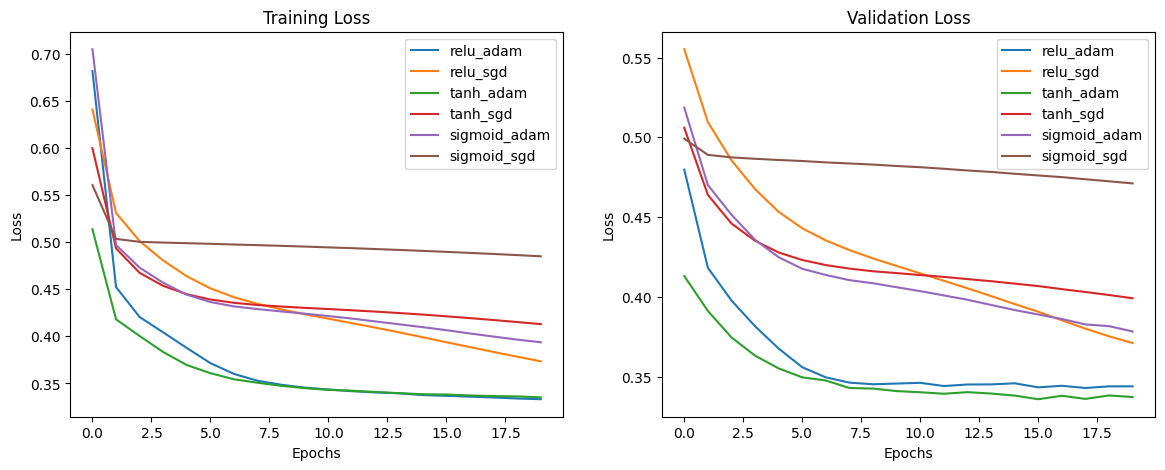

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
for key, history in histories.items():
    axes[0].plot(history["loss"], label=f"{key}")
axes[0].set_title("Training Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# Plot Validation Loss
for key, history in histories.items():
    axes[1].plot(history["val_loss"], label=f"{key}")
axes[1].set_title("Validation Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.show()